# **Insurance: Data Exploration**

## **Intro** 

### Welcome to the section on K-Means Clustering! K-means is a very powerful clustering algorithm that can be used to partition datasets into `k` different clusters. It does this using a fairly straightforward approach by trying to put each data point into a cluster with the nearest mean (or centroid of cluster), and it is also very easy to utilize in Python! We will go in to great detail about this algorithm in the next notebook as well as talk all about clustering and how to really apply this data, but here we will be doing the initial preprocessing of the data in order to get it ready to work with.

### The dataset we are using (https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset) is a health insurance dataset and contains information about age, smoking status, BMI, region, and more. Feel free to check the link out to read all about the data. By using K means clustering we can explore diverse attributes - both continuous (like age, BMI) and categorical (like smoker, region) - which will aid in understanding how clustering adapts to different types of data. Through clustering we can identify groups of customers who share similar attributes. For instance, we might discover a cluster of young, non-smoking individuals with low BMI or a cluster of older individuals from a particular region with high insurance charges. That being said, there is lots of nuance in the interpretation of the cost of healthcare, so be sure to check out Module 7 to understand the implications of working with this type of data.

### As you learned in module 2, the most important part of data science and machine learning is `getting to know` your data. This means understanding what it consists of, how to preprocess it in order to build models, and also beginning to figure out what questions you want to ask down the road. While it may not be entirely clear yet what clustering is yet, the whole point is to group related data points in your data together so you can see if there are any patterns based on the distribution of your data. Before we do all that, however, lets first do some data exploration!

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Load data and check out the first few rows to make sure everything imported properly.

In [2]:
# Import the dataset
df = pd.read_csv('insurance.csv')

# Display the first few rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Now lets get some basic summary statistics of the data using `df.describe()`

In [3]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### We will leave you to draw your own conclusions from this, but it looks like the range of insurance charges is quite high, which makes sense! We also may have some outliers in the BMI category, but we will probe that soon.

### Let's check to see if there are any null values using `df.info()` which will tell us the data types and how many null counts of each feature (or column) there are in this dataset 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


### So we do not have any null data which is good (we can tell because each feature has 1338 non-null count which is the same as the number of total observations), but we do have a mix of categorical (object) and numerical (int and float) data. As machine learning models work with numbers, lets go ahead and convert these all to be numeric form

### For things like smoking or non smoking, we can use simple ordinal mapping (1 or 0) to represent this in our data. We can first check that we only have `yes` or `no` in the smoking column by using the built in `unique()` function from pandas. In Module 2 we did a lot of work to make everything lowercase and remove white space which is also a good approach, but as we increase in complexity we want to show you the simplest ways to do easy things like this.

In [5]:
print(df['smoker'].unique())


['yes' 'no']


### So there are only `yes` or `no` values in our dataset! If there were things like `yeah` or `YES`, these would have been reported from the `.unique()` function. Now that we know this we can proceed to do our ordinal mapping

In [6]:
# Define the mapping dictionary
smoking_mapping = {'yes': 1, 'no': 0}

# Apply the mapping to the 'smoker' column
df['smoker'] = df['smoker'].map(smoking_mapping)

# Display the first few rows to verify the change
print(df.head())

   age     sex     bmi  children  smoker     region      charges
0   19  female  27.900         0       1  southwest  16884.92400
1   18    male  33.770         1       0  southeast   1725.55230
2   28    male  33.000         3       0  southeast   4449.46200
3   33    male  22.705         0       0  northwest  21984.47061
4   32    male  28.880         0       0  northwest   3866.85520


### Great! Now lets take care of the data where ordinal mapping is not appropriate (sex and region). For these, we will just do one hot encoding on them to represent the different features in their own category. Here is a visual reminder of what one hot encoding is doing in case you need a reference

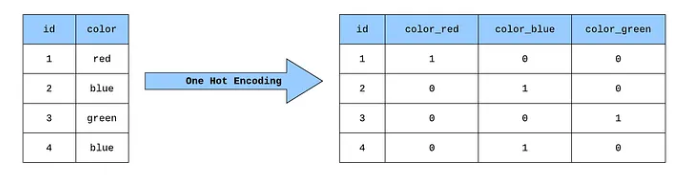

In [7]:
# Do one hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'region'])


# convert true false to 1 or 0 using boolean logic
cols_to_convert = ['sex_female', 'sex_male', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
df_encoded[cols_to_convert] = df_encoded[cols_to_convert].astype(int)

# Display the first few rows to verify the change
print(df_encoded.head())


   age     bmi  children  smoker      charges  sex_female  sex_male  \
0   19  27.900         0       1  16884.92400           1         0   
1   18  33.770         1       0   1725.55230           0         1   
2   28  33.000         3       0   4449.46200           0         1   
3   33  22.705         0       0  21984.47061           0         1   
4   32  28.880         0       0   3866.85520           0         1   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0  


## Data Visualization

### Now we will move on to starting to visualize our data and get some information about how it is distributed. The first thing we want to do is probe the distribution of the numerical data `age`, `bmi`, `children`, and `charges`. We know these data are numerical based on the information we got from `df.info` earlier under the Dtype column, A good place to start with this is by making a histogram which we can do using the built in `.hist()` function in pandas. 

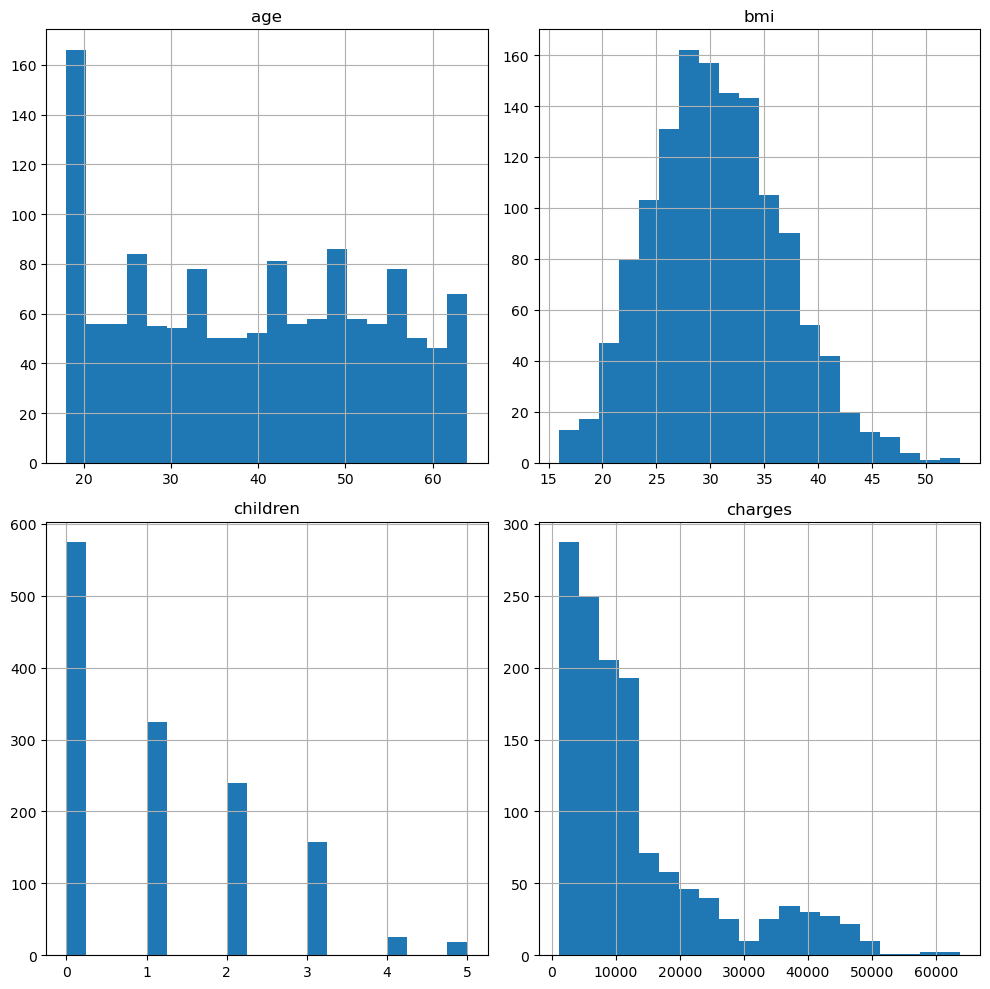

In [8]:
# Select only the columns wwe want to display from the DataFrame 'df' and make histograms
# # bins=20 means each individual histogram will have 20 bins.
df[['age', 'bmi', 'children', 'charges']].hist(figsize=(10,10), bins=20)

# Adjust the padding between and around the subplots (histograms) for a cleaner look.
plt.tight_layout()

# Display the figure containing the histograms.
plt.show()

### BMI seems to follow a normal distribution, and the charges are right skewed (aka, positively skewed). Most people have 0 children and there is a pronounced peak at the age of 20, indicating a higher representation from this age group. Apart from this, other ages seem fairly evenly distributed across the dataset.

### Given our observation about the `BMI`'s distribution, it's worth exploring it further with a `QQ (Quantile-Quantile) plot`. While we haven't delved into QQ plots in our previous discussions at Code Grand Rounds, it's an essential tool in statistics that you'll find valuable.

### A QQ plot helps in determining the nature of a distribution by comparing the quantiles of a dataset to the quantiles of a standard distribution, usually the normal (Gaussian) distribution. The closer the data points in the QQ plot adhere to the reference line, the more the dataset's distribution aligns with the standard distribution in question. It's an effective way to visually inspect how well your data aligns with theoretical distributions, be it normal, binomial, exponential, and so on. We can also probe use this plot to see whether the `charges` feature is right skewed.

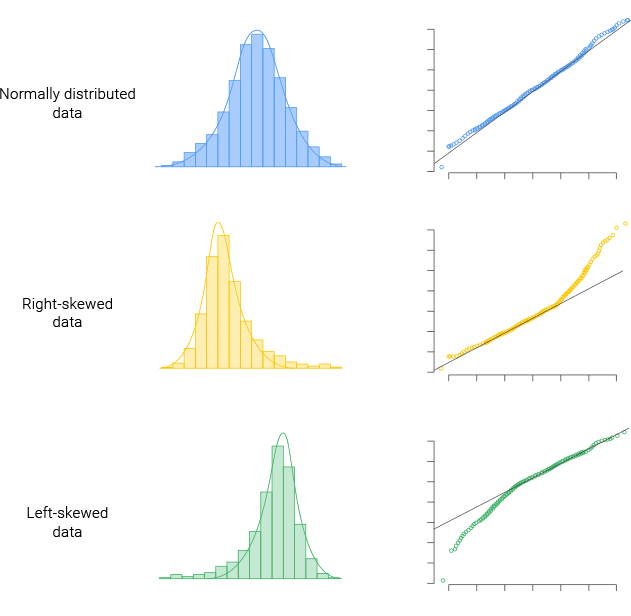

### Remember, QQ plots are primarily visual tools. They allow you to visually assess the alignment of your data with an expected standard distribution. If the QQ plot deviates significantly from the reference line, it indicates that the data doesn't follow the assumed distribution.

### We can easily make QQ plots in Python using the stats module as shown below!

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


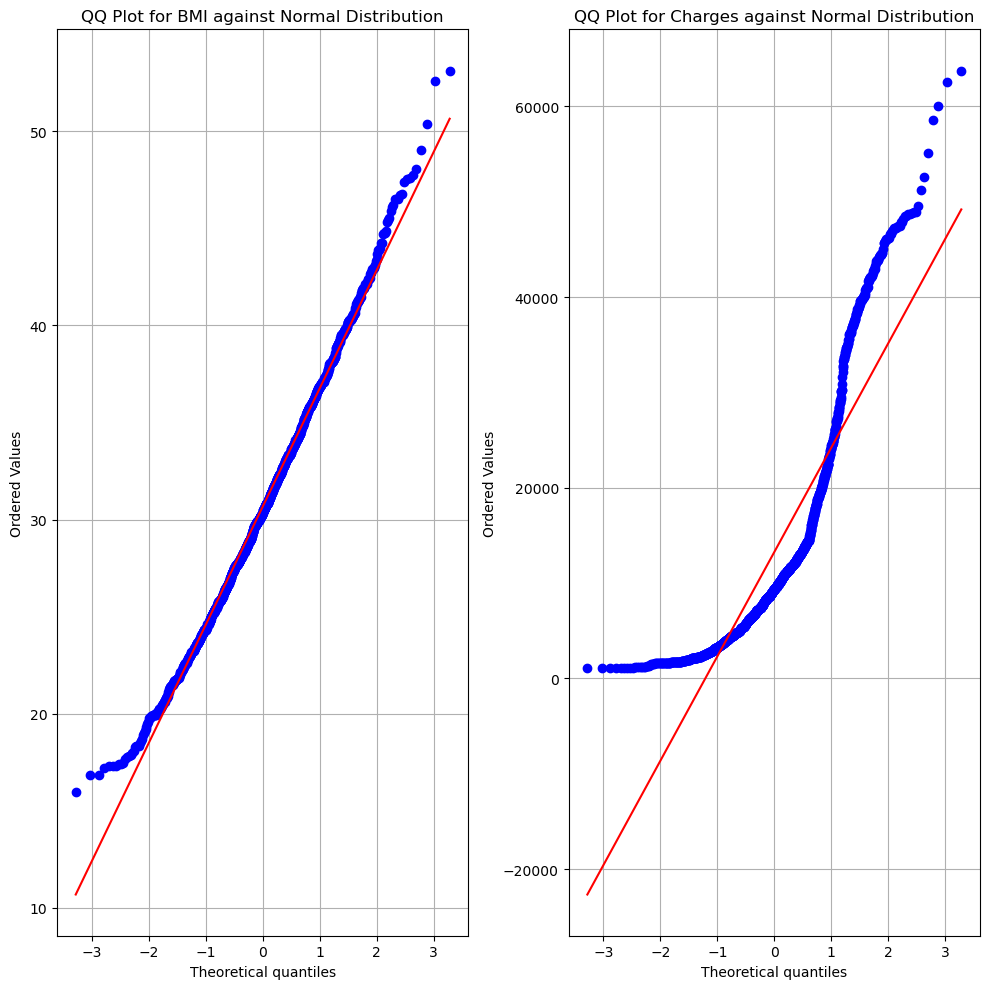

In [9]:

# Set figure size
plt.figure(figsize=(10, 10))

# Plot for BMI
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot number 1
stats.probplot(df_encoded["bmi"], plot=plt)
plt.title("QQ Plot for BMI against Normal Distribution")
plt.grid(True)

# Plot for charges
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot number 2
stats.probplot(df_encoded["charges"], plot=plt)
plt.title("QQ Plot for Charges against Normal Distribution")
plt.grid(True)

# Display the plots
plt.tight_layout() 
plt.show()

### There really is nothing quite like the joy of learning a new graphing technique for the first time... But anyway! Based on these data it looks like our hypotheses were correct! Notice how the blue line (our data) closely matches the red line (standard distribution) for the `BMI` feature, and in the `charges` feature it does not! In fact, if you look back up at the graphic we provided above, the `charges` line (blue) looks a lot like the right skewed data example. The upward curve in the QQ plot's right tail indicates that there are more extreme values in the high range of your dataset than what would be expected if it followed a normal distribution. Essentially, there's a heavier right tail in the data than in the normal distribution which matches with what we see in the histogram. Pretty neat!

### Now lets make a correlation matrix to look for relationships between our numerical data. Remember that these use the pearson correlation coefficient to check for correlation between variables.

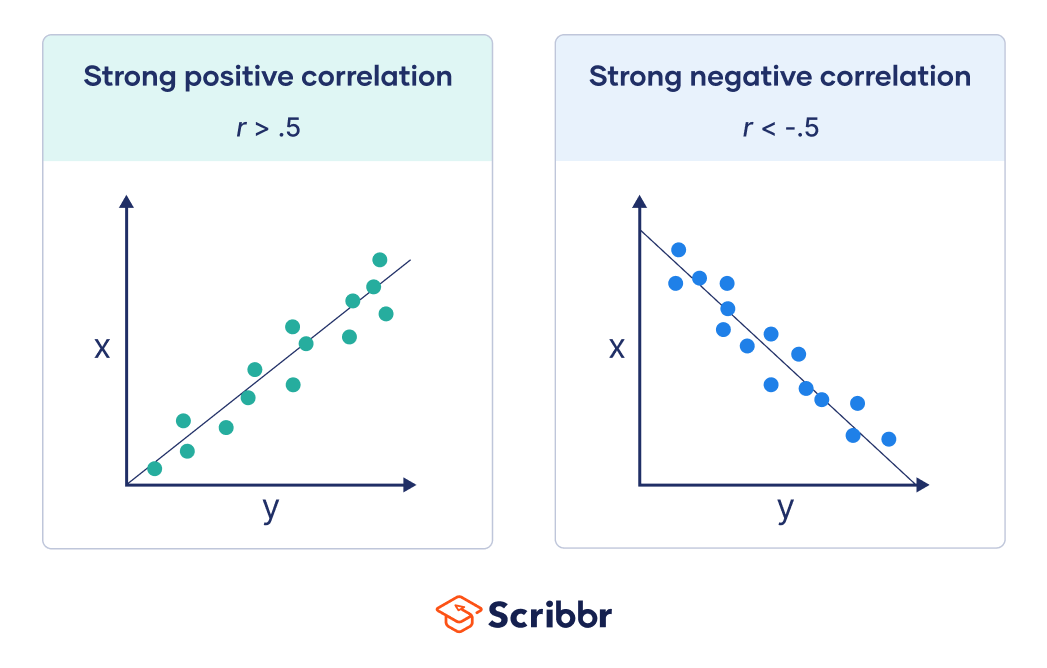

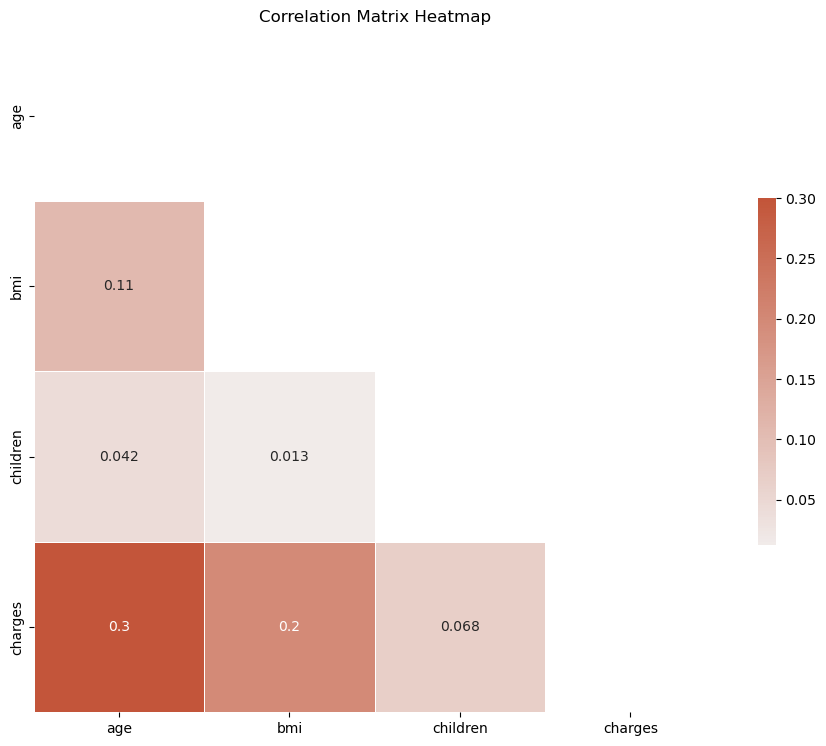

In [10]:
corr = df[['age', 'bmi', 'children', 'charges']].corr() # This line computes the correlation matrix of the DataFrame.
                 #  It calculates the Pearson correlation coefficient for each pair of numerical columns. 
                 # Post cleaning, all of our columns have some kind of numerical representation.

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) #  Here, create a mask for the upper triangle of your correlation matrix. 
                                               # This is done because the matrix is symmetric, i.e., the lower triangle is a mirror 
                                               # image of the upper triangle. Thus, showing both would be redundant.
                                               # You don't technially need to do this, but its a nice trick...

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask
# Look at the sns documenttion for details on all of the arguments. 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
# # For website- seaborn is generally an easier way to make heatmaps
# # Assuming your df is already loaded
# corr = df[['age', 'bmi', 'children', 'charges']].corr() # This line computes the correlation matrix of the DataFrame.

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Convert the mask to NaN values where True (for upper triangle)
# masked_array = np.where(mask, np.nan, corr)

# # Create the colormap. You might want to tweak the values for your specific use case.
# cmap = plt.get_cmap("coolwarm")

# fig, ax = plt.subplots(figsize=(18, 15))

# # Using matshow here to create the heatmap, tweak vmin/vmax to fit the range you want
# cax = ax.matshow(masked_array, cmap=cmap, vmin=-1, vmax=1)

# # Display the correlation values on each cell
# for (i, j), z in np.ndenumerate(masked_array):
#     if not np.isnan(z):  # Only print the lower triangle values
#         ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

# # To show the colorbar on the side
# fig.colorbar(cax)

# # Set the ticks with the column names
# ax.set_xticks(np.arange(len(corr.columns)))
# ax.set_yticks(np.arange(len(corr.columns)))
# ax.set_xticklabels(corr.columns)
# ax.set_yticklabels(corr.columns)
# plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

# ax.set_title('Correlation Matrix Heatmap')
# plt.show()


### Based off of this we do not observe any strong correlations in our data. The strongest one is between age and number of charges which makes some sense intuitively, but it is definitely not very strong based on it's realtively low pearson correlation coefficient of .3

### Even though based on this data we don't really expect any linear relationships, we can still take a look using a pairplot.

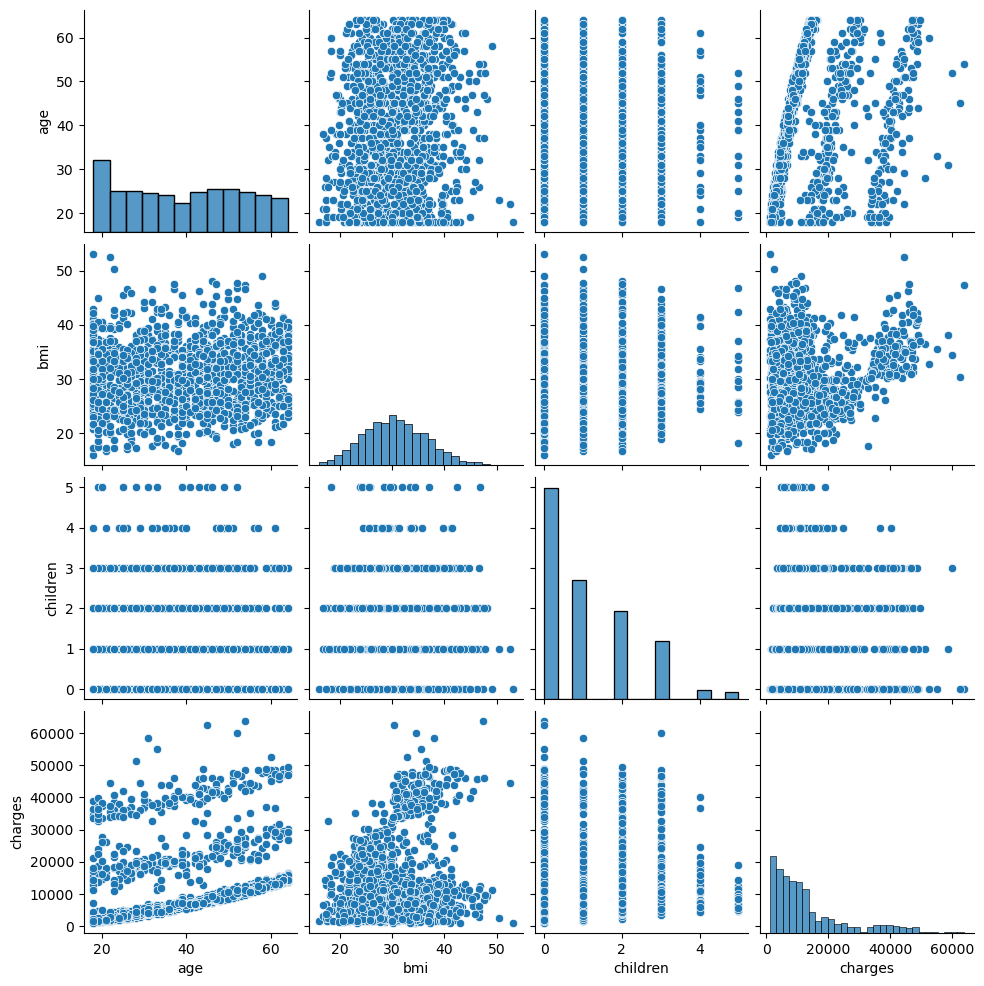

In [12]:
# This is the optimal way to render a pairplot, but we are (currently at least)
# unable to use seaborn due to version incompatibilities
sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
plt.show()

### So when we look at the relatinoships between each data point as a whole, we dont observe any linear relationships. However, within certain features there are some very interesting trends that emerge. Take for example `age` vs `charges` in the  bottom left of the pairplot. It seems like there are three distinct clusters of data there, each with their own linear relatinoship. Maybe these clusters are differentiated by something that causes this separation in charges for the same age groups. This seems worth probing, and because we are all coders now, we can! 

### One of the nice tricks of data visualization is learning to use color intelligently. In a 2D plot, you only have 2 axes with which to show data, but by leveraging the color of the data points you can introduce another dimension in your analysis. Also keep in mind that every dot on the pairplot represents one observation (or person in this case). These observations have other categorical features within them that we are currently not considering (like smoking, region, sex). 

### Let's start with smoking as we performed ordinal mapping on it earlier so there are only two values, and it seems logical that a persons smoking status may cause someone to incur higher insurance costs a younger age. We can test this hypothesis by coloring each observation based on their smoking status in seaborn quite easily.

### All we have to do is make another subset of the data that also contains the `smoking` feature in addition to our numerical features and tell `seaborn` to color the data based on that using the `hue` argument. See below for the implementation!

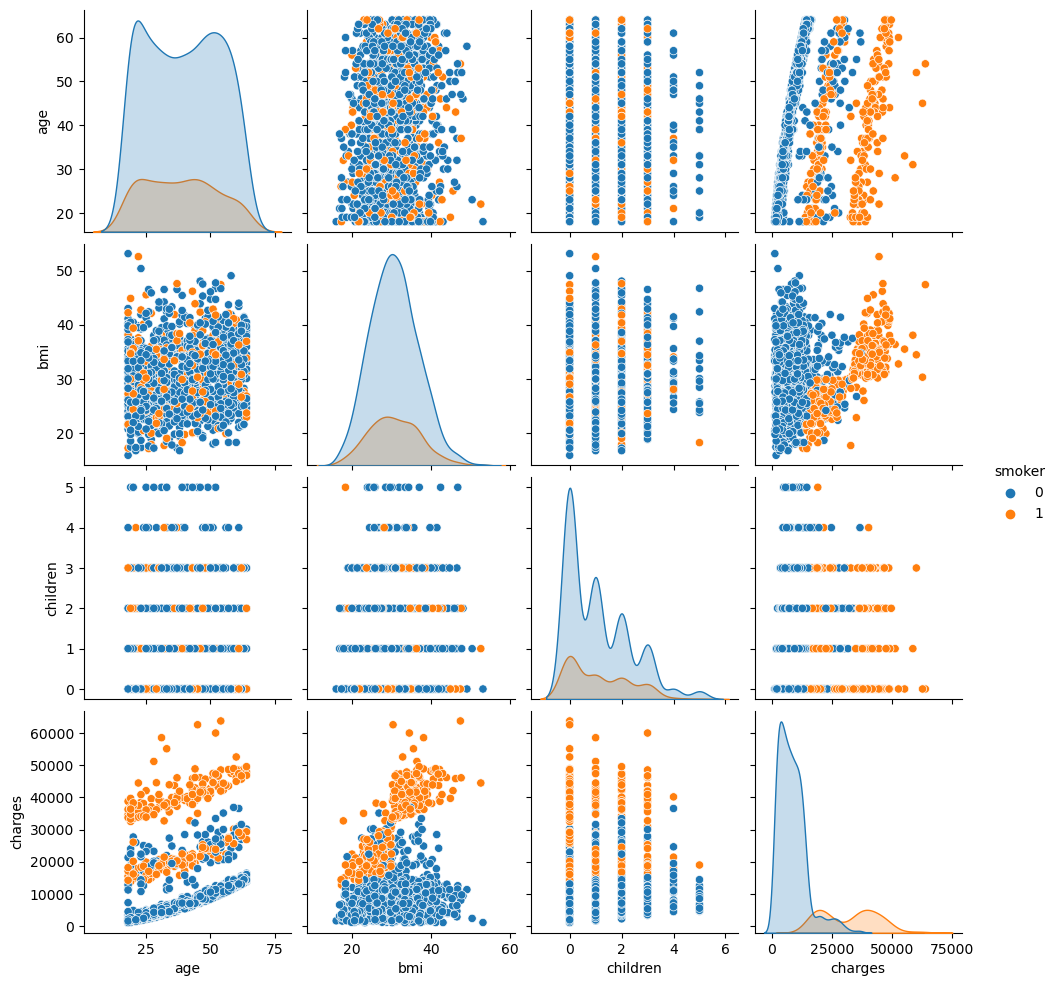

In [13]:
# This is the optimal way to render a pairplot, but we are (currently at least)
# unable to use seaborn due to version incompatibilities

smoker_subset = df[['age', 'bmi', 'children', 'charges', 'smoker']]
sns.pairplot(smoker_subset, hue='smoker')
plt.show()

### And check that out! We can see that smoking status seems to be very important in someone having higher insurance charges at any age, which makes sense! When we color by smoking, we also seem to identify a cluster of people that have a BMI from ~30-45 that also have higher charges. 

### We hope this example illustrates the multiple layers of information that can be iteratively pulled out of data. You just have to sit there and think about it sometime in order to come up with a hypothesis you want to test, but once you figure out the question you want to ask you can always (or most of the time) figure out the code you need to write to get your answer. Another interesting thing would be to color the patients by BMI category and seeing if that tells you anything. We have given you some starter code below to try this out.

In [14]:
def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi < 25:
        return 'Normal Weight'
    elif bmi >= 25 and bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
    
# make a new column in the dataframe that specified weight condition based on BMI
# This is a nice trick to apply a function to a dataframe
df['weight_condition'] = df['bmi'].apply(get_bmi_category)

### Write the code here to plot the data color coding by weight condition!

### That is all we have for you in this section! We did a very thorogh exploratory data analysis here, but remember, you can always do more! We are excited to get into the workings of K-means clustering now though, so head on over and we will get started building and learning about the algorithm!